# Import Library

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(color_codes=True)

## Membaca Dataset

In [23]:
df = pd.read_csv('dataset/bankchurn.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Data Cleaning

mengecek dataset


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


mengecek duplikat dalam dataset

In [25]:
df.duplicated().sum()

0

mengdrop kolom surname karena tidak akan terpakai


In [26]:
df.drop(['Surname', 'CustomerId', 'RowNumber'], axis = 1,inplace=True)
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Exploratory Data Analysis 

In [27]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00,10000.00
mean,650.53,38.92,5.01,76485.89,1.53,0.71,0.52,100090.24,0.20
std,96.65,10.49,2.89,62397.41,0.58,0.46,0.50,57510.49,0.40
min,350.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58,0.00
25%,584.00,32.00,3.00,0.00,1.00,0.00,0.00,51002.11,0.00
50%,652.00,37.00,5.00,97198.54,1.00,1.00,1.00,100193.91,0.00
75%,718.00,44.00,7.00,127644.24,2.00,1.00,1.00,149388.25,0.00
max,850.00,92.00,10.00,250898.09,4.00,1.00,1.00,199992.48,1.00


In [28]:
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns

Mengecek persebaran data variabel numerical

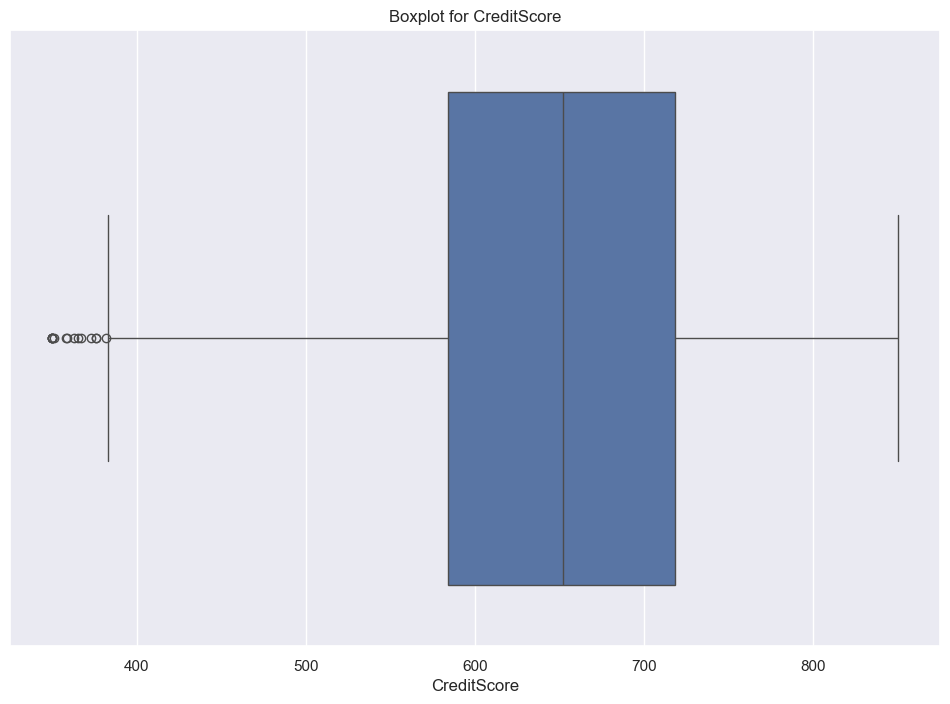

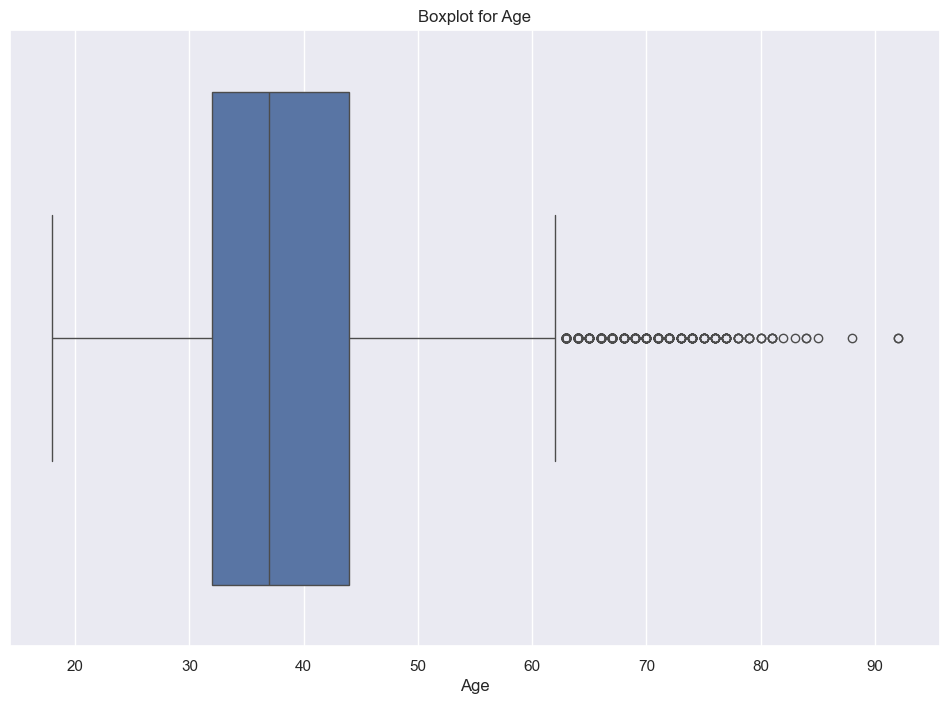

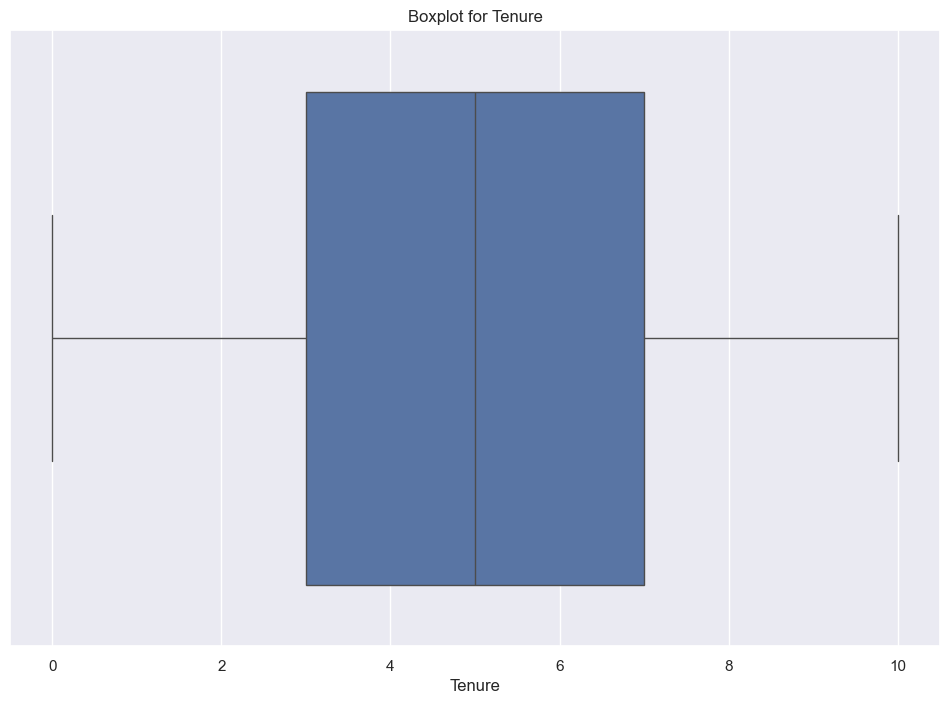

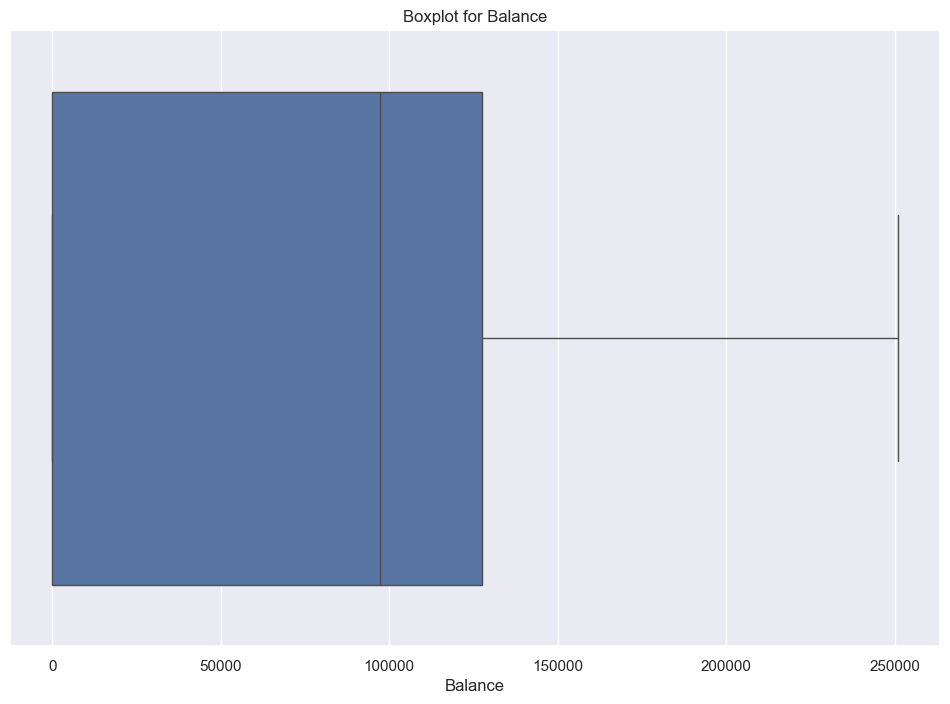

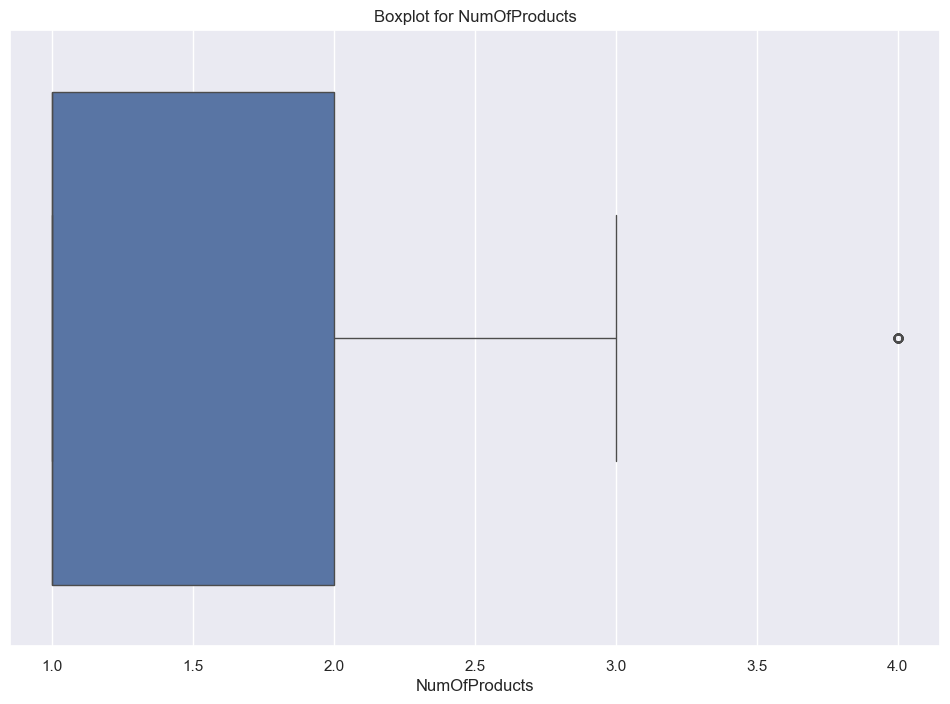

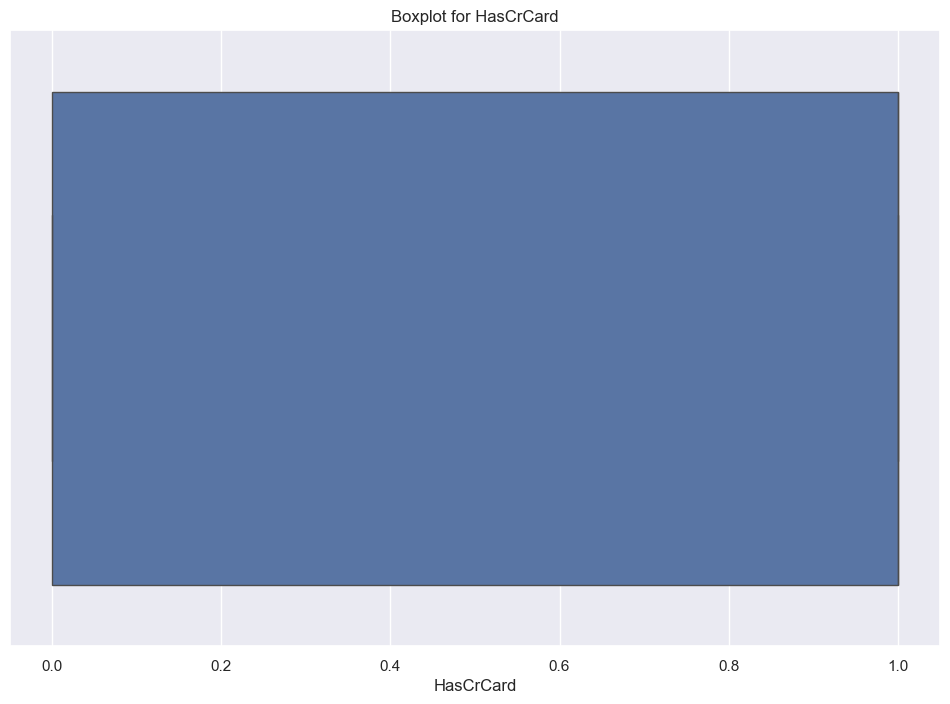

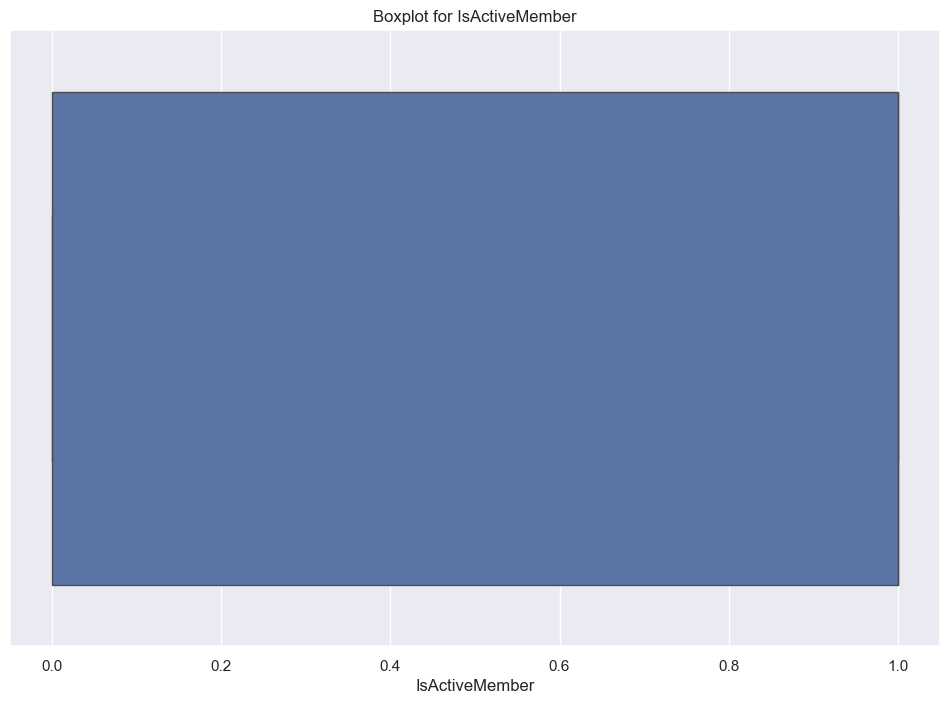

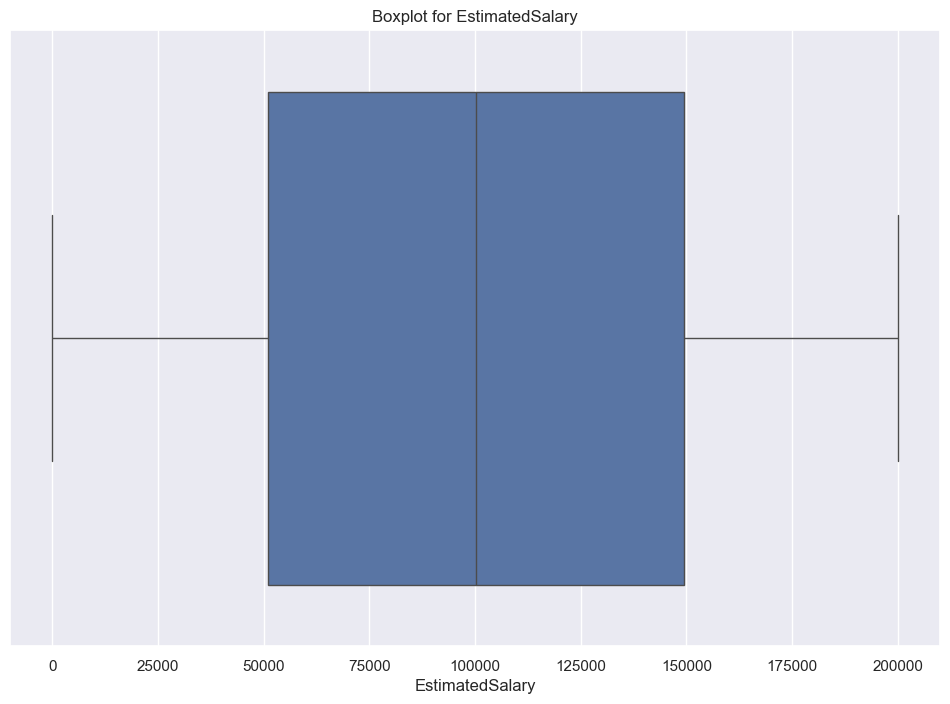

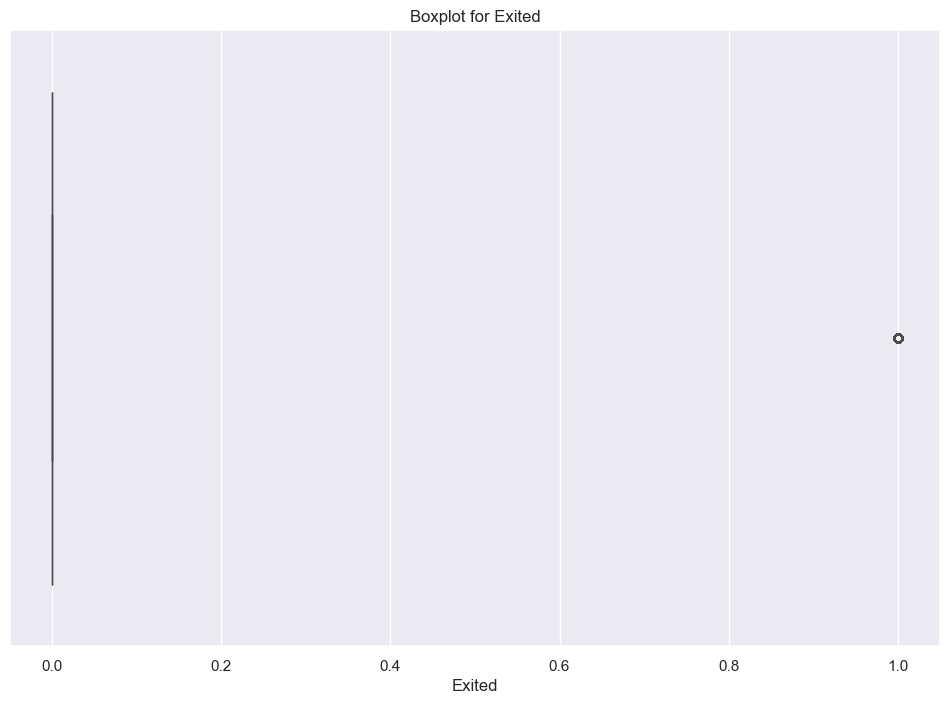

In [29]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

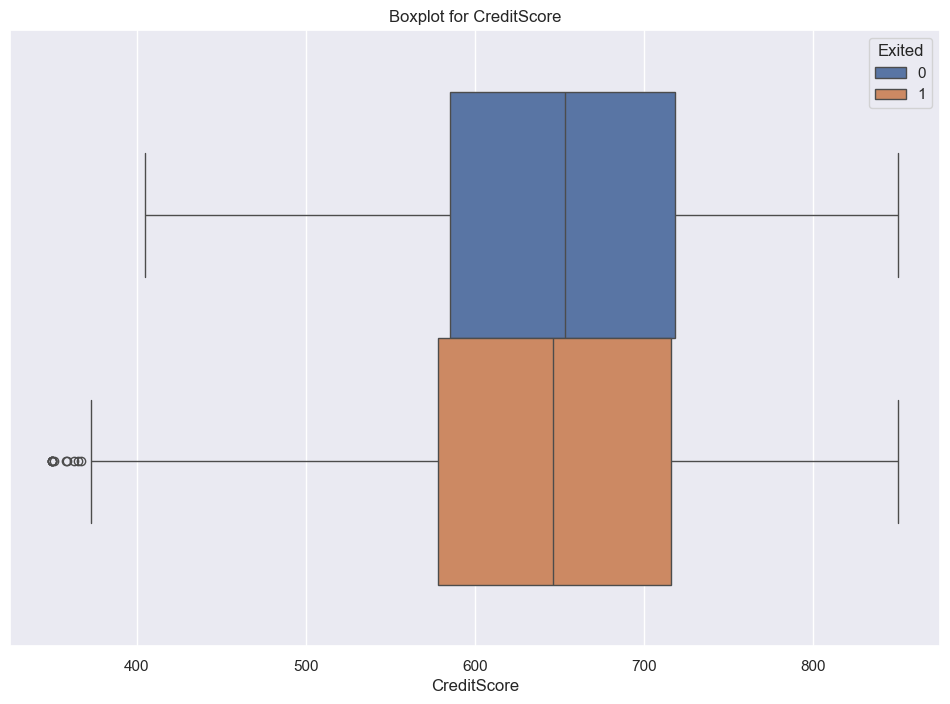

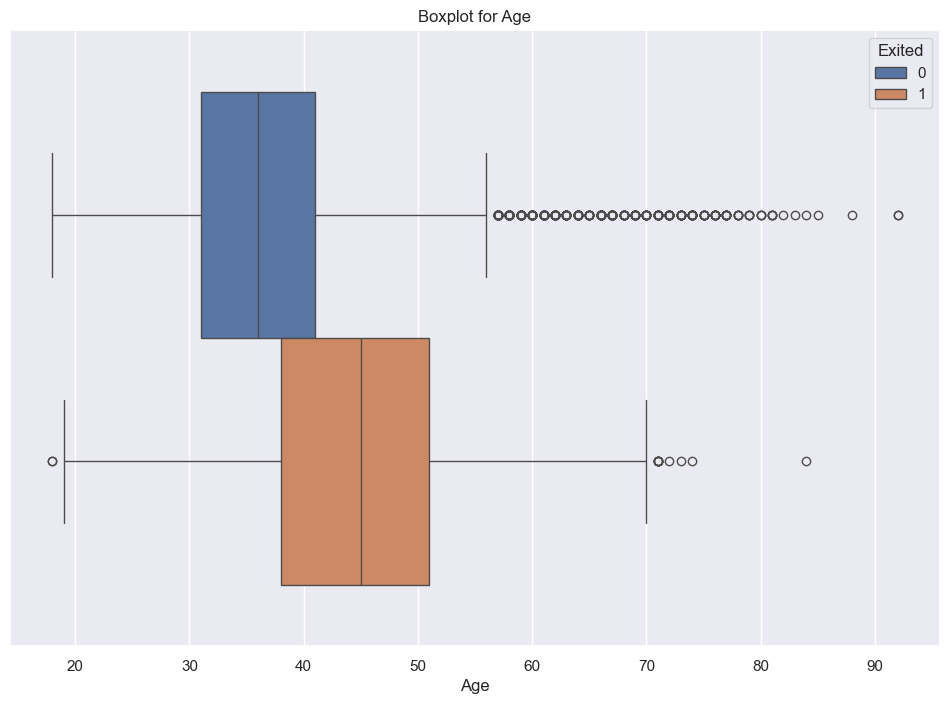

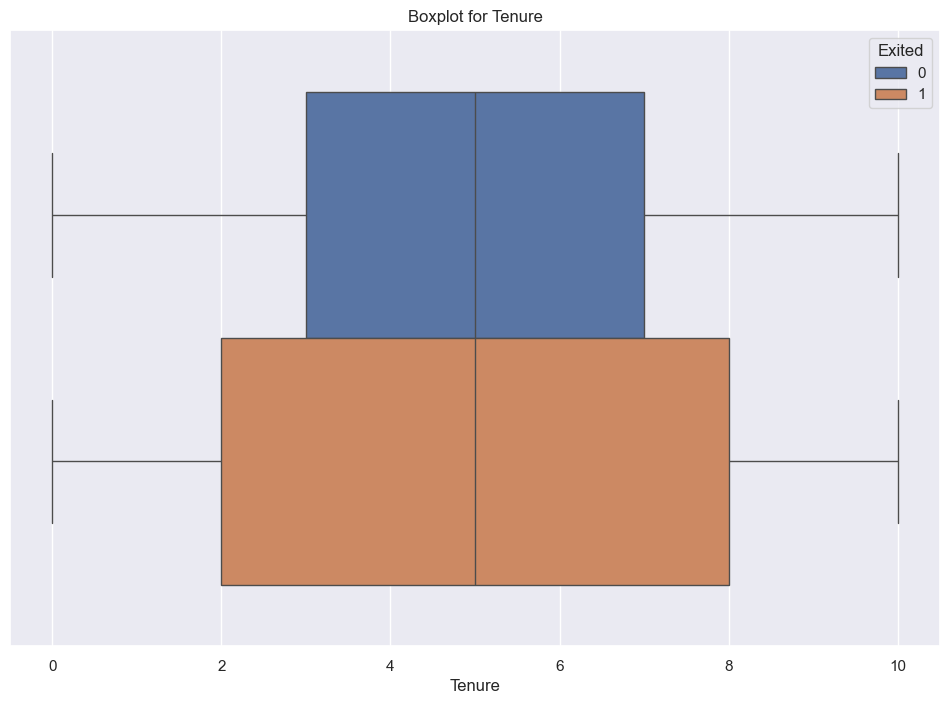

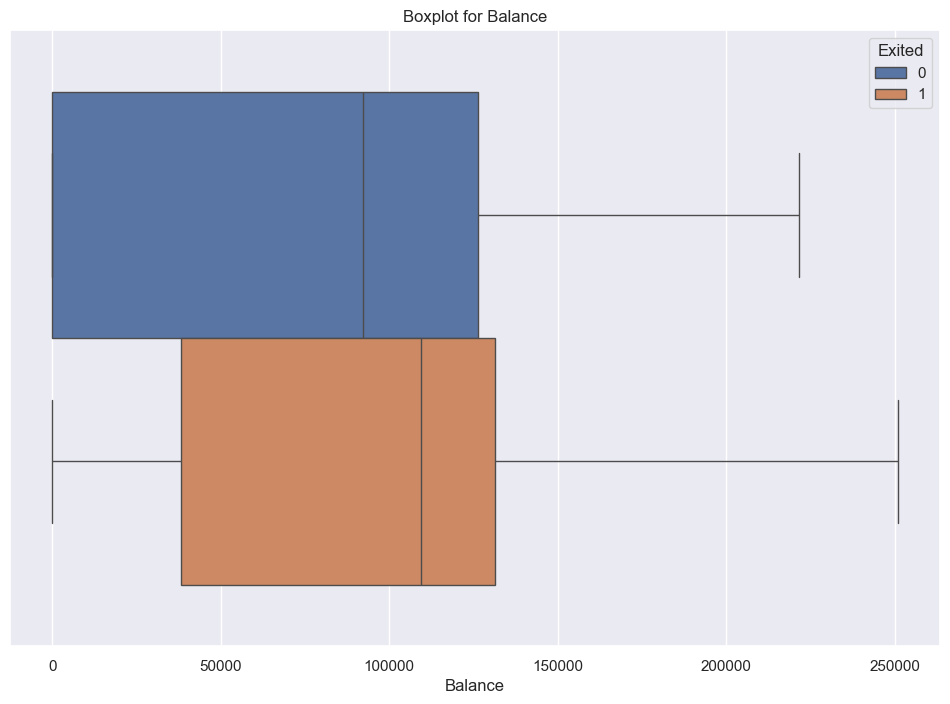

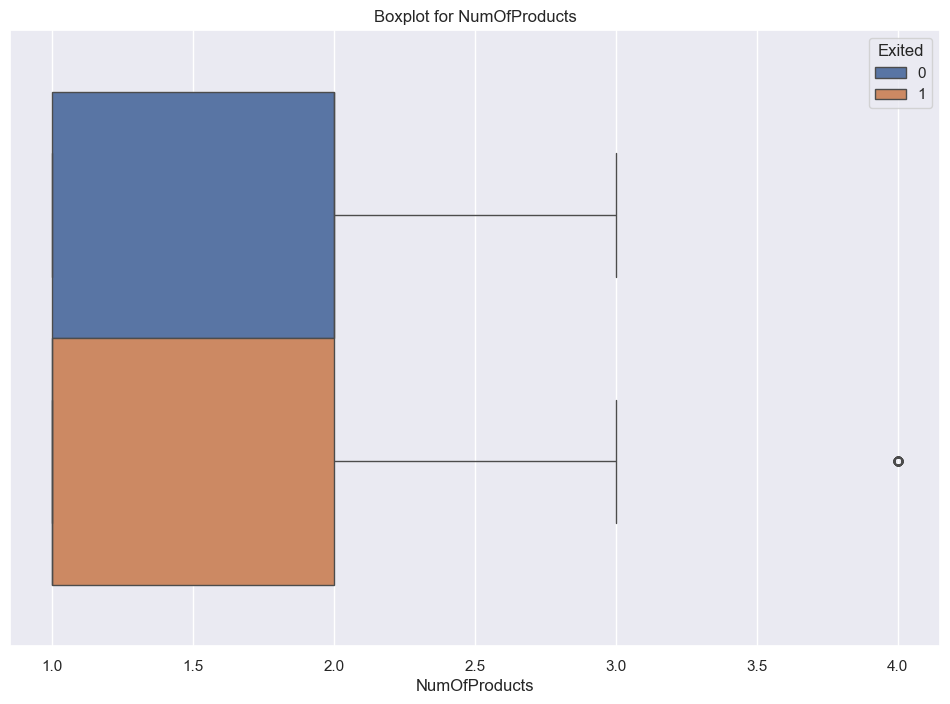

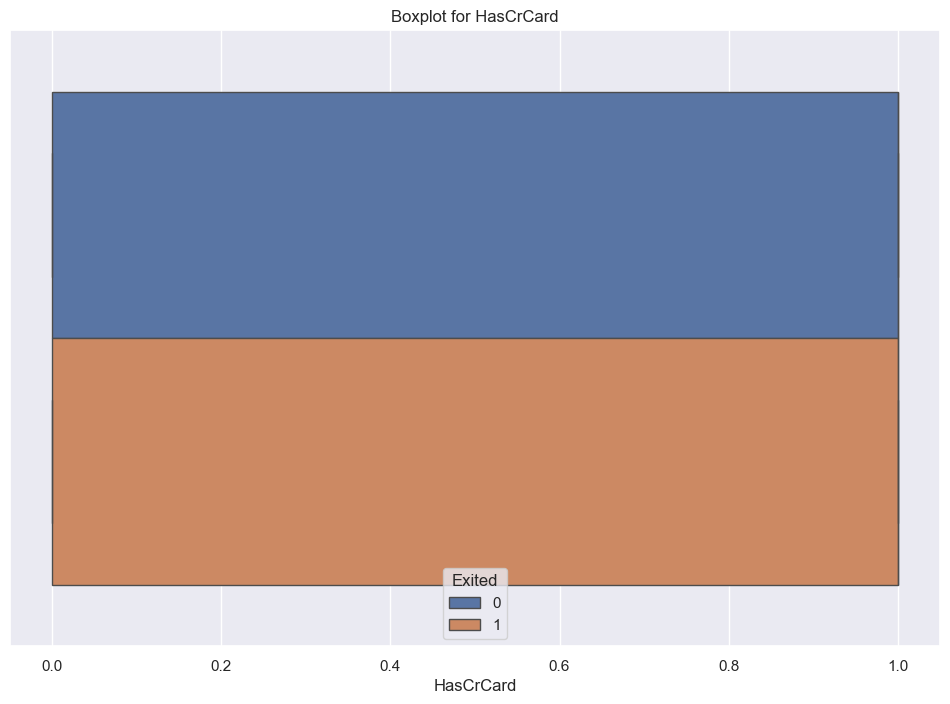

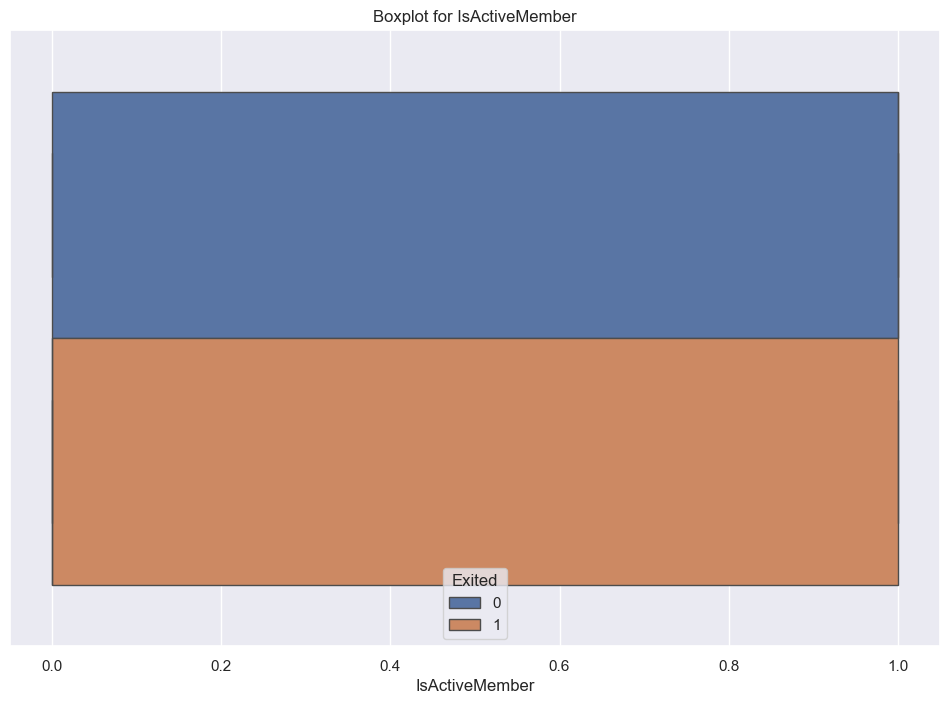

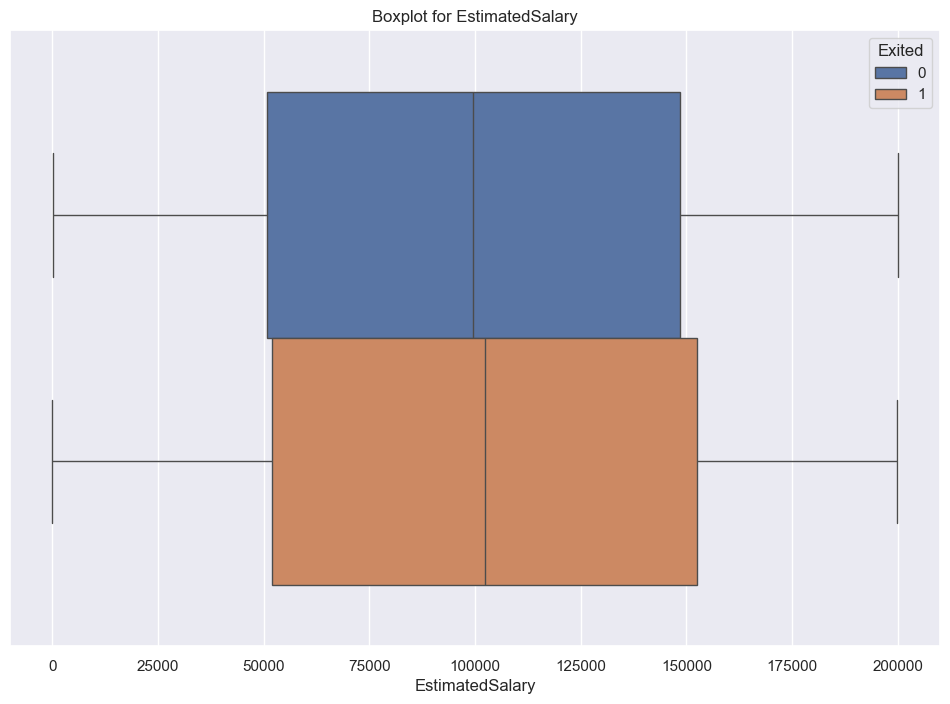

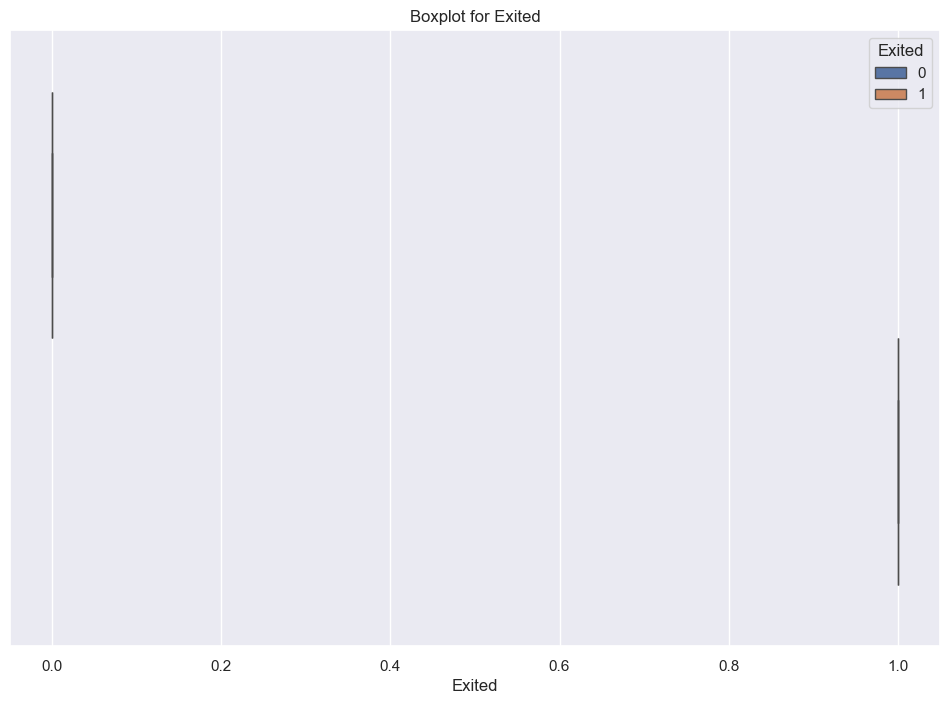

In [47]:
for column in numerical_columns:
    plt.figure(figsize=(12,8))
    sns.boxplot(x=column, hue='Exited' , data=df)
    plt.title(f'Boxplot for {column}')
    plt.show()

Mengecek perbandingan Data Kategorikal terhadap variabel target (y)

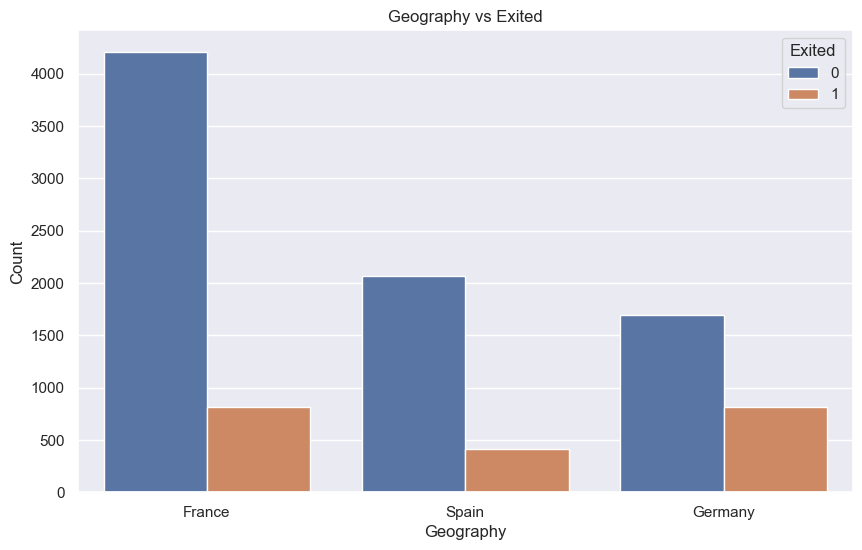

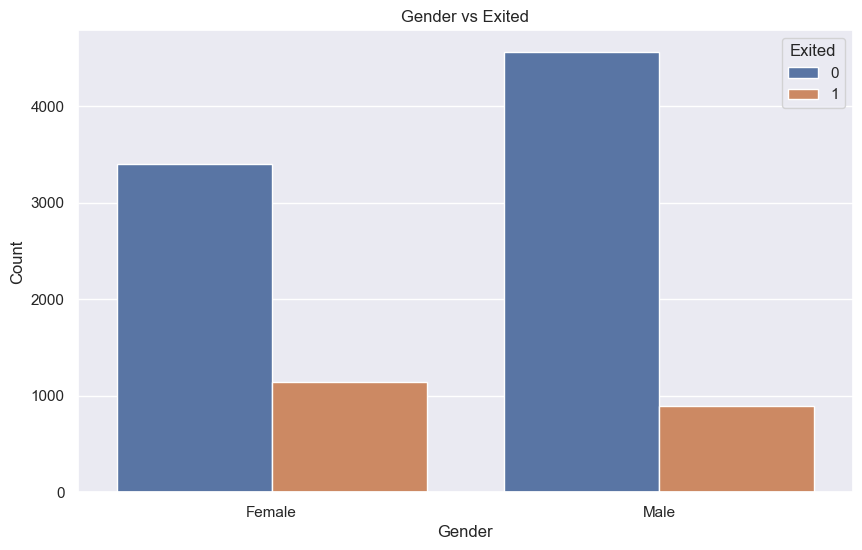

In [30]:
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Exited', data=df)
    plt.title(f'{column} vs Exited')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.show()

Mengecek unique 

In [31]:
for column in categorical_columns:
    value_counts = df[column].value_counts()
    print(f"Counts for {column}:\n{value_counts}\n")

Counts for Geography:
Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

Counts for Gender:
Gender
Male      5457
Female    4543
Name: count, dtype: int64



Melakukan Label Encoding untuk mengubah kolom kategorikal menjadi numerikal

In [32]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
for column in categorical_columns:
    # Mencetak unique values sebelum label encoding
    print(f"Unique values untuk kolom '{column}' sebelum label encoding:")
    print(df[column].unique())
    # Melakukan label encoding
    df[column] = label_encoder.fit_transform(df[column])
    # Mencetak unique values setelah label encoding
    print(f"\nUnique values untuk kolom '{column}' setelah label encoding:")
    print(df[column].unique())
    print()

Unique values untuk kolom 'Geography' sebelum label encoding:
['France' 'Spain' 'Germany']

Unique values untuk kolom 'Geography' setelah label encoding:
[0 2 1]

Unique values untuk kolom 'Gender' sebelum label encoding:
['Female' 'Male']

Unique values untuk kolom 'Gender' setelah label encoding:
[0 1]



In [33]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


Melihat korelasi antar data

In [34]:
df.corr()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.00,0.01,-0.00,-0.00,0.00,0.01,0.01,-0.01,0.03,-0.00,-0.03
Geography,0.01,1.00,0.00,0.02,0.00,0.07,0.00,-0.01,0.01,-0.00,0.04
Gender,-0.00,0.00,1.00,-0.03,0.01,0.01,-0.02,0.01,0.02,-0.01,-0.11
Age,-0.00,0.02,-0.03,1.00,-0.01,0.03,-0.03,-0.01,0.09,-0.01,0.29
Tenure,0.00,0.00,0.01,-0.01,1.00,-0.01,0.01,0.02,-0.03,0.01,-0.01
Balance,0.01,0.07,0.01,0.03,-0.01,1.00,-0.30,-0.01,-0.01,0.01,0.12
NumOfProducts,0.01,0.00,-0.02,-0.03,0.01,-0.30,1.00,0.00,0.01,0.01,-0.05
HasCrCard,-0.01,-0.01,0.01,-0.01,0.02,-0.01,0.00,1.00,-0.01,-0.01,-0.01
IsActiveMember,0.03,0.01,0.02,0.09,-0.03,-0.01,0.01,-0.01,1.00,-0.01,-0.16
EstimatedSalary,-0.00,-0.00,-0.01,-0.01,0.01,0.01,0.01,-0.01,-0.01,1.00,0.01


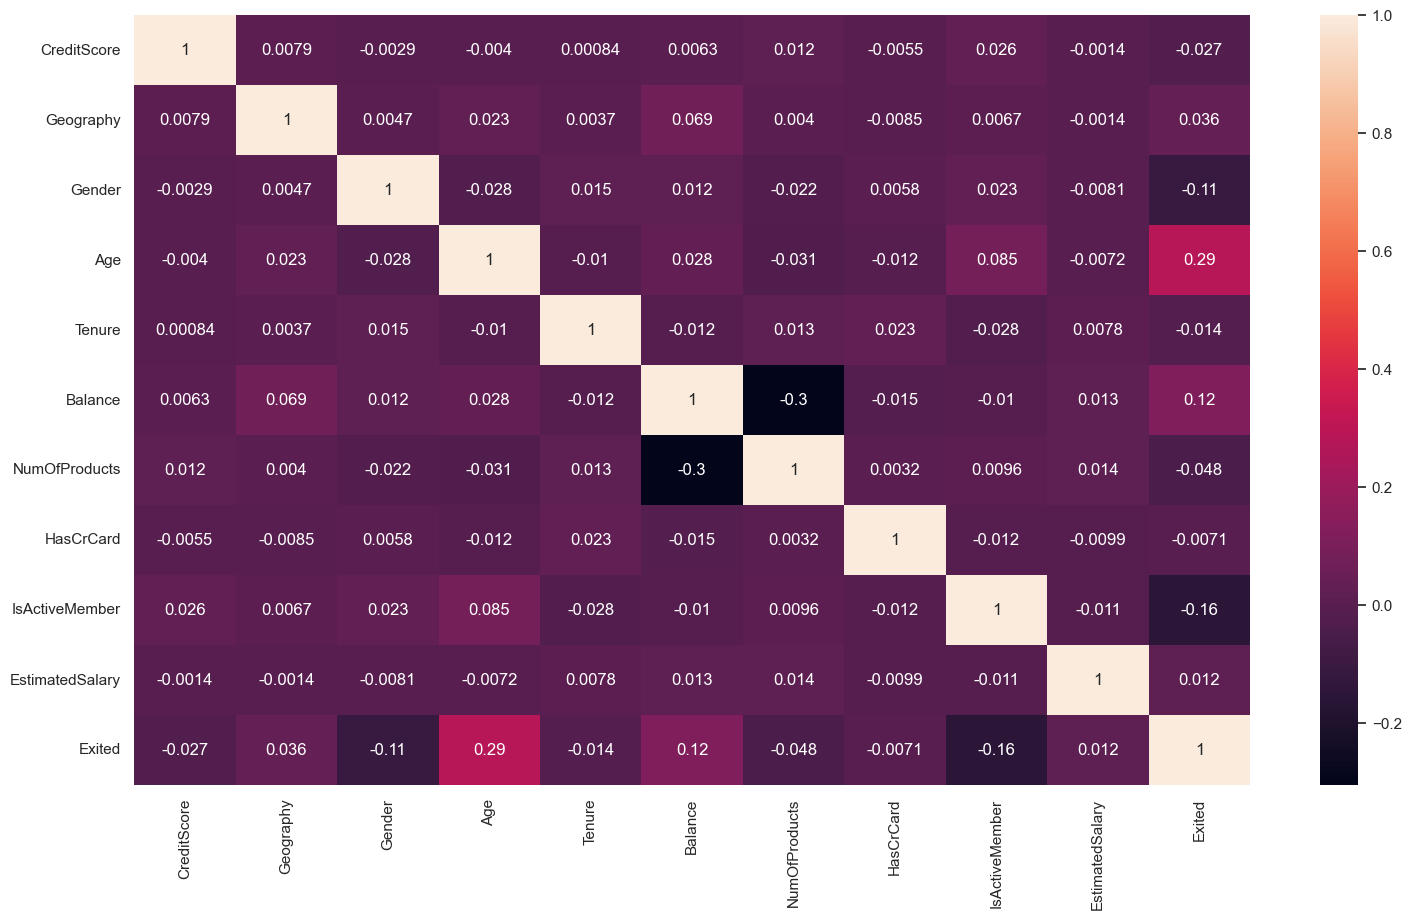

In [35]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [36]:
print(f"counts for : \n {df['Exited'].value_counts()}")

counts for : 
 Exited
0    7963
1    2037
Name: count, dtype: int64


Membagi dataset menjadi X dan y

In [37]:
X = df.drop('Exited', axis=1)
y = df['Exited']

Melakukan OverSampling untuk membuat variabel Y yang awalnya tidak seimbang menjadi seimbang

In [38]:
import random
from imblearn.over_sampling import RandomOverSampler

oversampler = RandomOverSampler(random_state=64)
X, y = oversampler.fit_resample(X, y)


In [39]:
print(f"counts for : \n {y.value_counts()}")

counts for : 
 Exited
1    7963
0    7963
Name: count, dtype: int64


Mengsplit dataset menjadi data Train dan Testing serta Menstandarisasi dataset dengan RobustScaler

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = RobustScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
# Print according to the expected result
print('Jumlah baris dan kolom dari x_train adalah: \n', X_train.shape, ' \nSedangkan Jumlah baris dan kolom dari y_train adalah: \n', y_train.shape)
print('Persentase Stroke di data Training adalah:')
print(y_train.value_counts(normalize=True))
print('Jumlah baris dan kolom dari x_test adalah: \n', X_test.shape,'\nSedangkan Jumlah baris dan kolom dari y_test adalah: \n', y_test.shape)
print('Persentase Stroke di data Testing adalah:')
print(y_test.value_counts(normalize=True))

Jumlah baris dan kolom dari x_train adalah: 
 (12740, 10)  
Sedangkan Jumlah baris dan kolom dari y_train adalah: 
 (12740,)
Persentase Stroke di data Training adalah:
Exited
1   0.50
0   0.50
Name: proportion, dtype: float64
Jumlah baris dan kolom dari x_test adalah: 
 (3186, 10) 
Sedangkan Jumlah baris dan kolom dari y_test adalah: 
 (3186,)
Persentase Stroke di data Testing adalah:
Exited
0   0.51
1   0.49
Name: proportion, dtype: float64


Menggunakan LazyClassifier untuk mencari model yang sangat cocok dengan dataset kita

In [41]:
from lazypredict.Supervised import LazyClassifier
clf = LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models,predictions = clf.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/29 [00:00<?, ?it/s]

 97%|█████████▋| 28/29 [02:22<00:02,  2.92s/it]

[LightGBM] [Info] Number of positive: 6410, number of negative: 6330
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001055 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 859
[LightGBM] [Info] Number of data points in the train set: 12740, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.503140 -> initscore=0.012559
[LightGBM] [Info] Start training from score 0.012559


100%|██████████| 29/29 [02:22<00:00,  4.91s/it]

                               Accuracy  Balanced Accuracy  ROC AUC  F1 Score  \
Model                                                                           
ExtraTreesClassifier               0.96               0.96     0.96      0.96   
RandomForestClassifier             0.95               0.95     0.95      0.95   
BaggingClassifier                  0.94               0.94     0.94      0.94   
ExtraTreeClassifier                0.91               0.91     0.91      0.91   
LabelPropagation                   0.91               0.91     0.91      0.91   
LabelSpreading                     0.91               0.91     0.91      0.91   
DecisionTreeClassifier             0.91               0.91     0.91      0.91   
XGBClassifier                      0.90               0.90     0.90      0.90   
LGBMClassifier                     0.85               0.85     0.85      0.85   
KNeighborsClassifier               0.81               0.81     0.81      0.81   
NuSVC                       

# Modelling

membuat fungsi agar reusable dengan beberapa model sekaligus

In [42]:
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix

def plot_confusion_matrix(conf_mat):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_mat, annot=True, fmt="d", cmap="Blues", cbar=False,
                xticklabels=[0, 1], yticklabels=[0, 1])
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

def evaluate(model):
    # Training the model
    model.fit(X_train, y_train)

    # Making predictions
    y_pred = model.predict(X_test)

    # Print evaluation metrics
    print("Akurasi Pelatihan:", model.score(X_train, y_train))
    print("Akurasi Testing:", model.score(X_test, y_test))
    print('Accuracy Score:', accuracy_score(y_test, y_pred))
    print('Precision Score:', precision_score(y_test, y_pred, average='macro'))
    print('Recall Score:', recall_score(y_test, y_pred, average='macro'))
    print('F1 Score:', f1_score(y_test, y_pred, average='macro'))

    # Confusion Matrix
    conf_mat = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix {model} :")
    print(conf_mat)

    # Cross-validation
    y_pred_cv = cross_val_predict(model, X_train, y_train, cv=5)
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("Cross-validation scores:", cv_scores)
    print("Mean CV accuracy:", cv_scores.mean())

    # Plot Confusion Matrix
    plot_confusion_matrix(conf_mat)

    return conf_mat, cv_scores


# Evaluate Model

Akurasi Pelatihan: 1.0
Akurasi Testing: 0.9460138104205901
Accuracy Score: 0.9460138104205901
Precision Score: 0.9469529926820694
Recall Score: 0.9467210609889636
F1 Score: 0.9460127679697352
Confusion Matrix RandomForestClassifier() :
[[1500  133]
 [  39 1514]]
Cross-validation scores: [0.94270016 0.93014129 0.93524333 0.92503925 0.92935636]
Mean CV accuracy: 0.9324960753532181


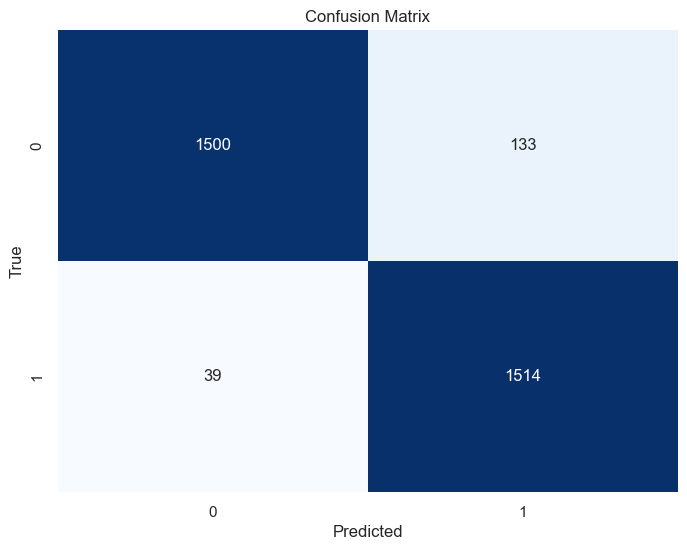

(array([[1500,  133],
        [  39, 1514]], dtype=int64),
 array([0.94270016, 0.93014129, 0.93524333, 0.92503925, 0.92935636]))

In [43]:
evaluate(RandomForestClassifier())

Akurasi Pelatihan: 1.0
Akurasi Testing: 0.9617074701820465
Accuracy Score: 0.9617074701820465
Precision Score: 0.9617419067296177
Recall Score: 0.9620303077740218
F1 Score: 0.9617025804735301
Confusion Matrix ExtraTreesClassifier() :
[[1550   83]
 [  39 1514]]
Cross-validation scores: [0.9532967  0.94387755 0.9466248  0.94309262 0.94191523]
Mean CV accuracy: 0.9457613814756671


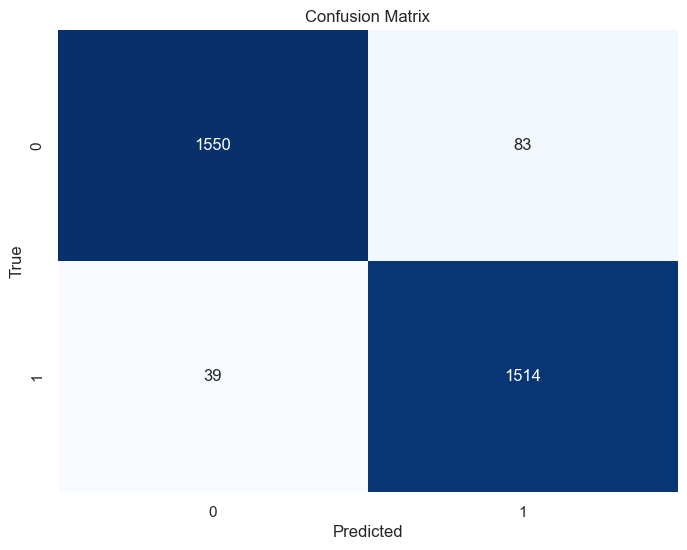

(array([[1550,   83],
        [  39, 1514]], dtype=int64),
 array([0.9532967 , 0.94387755, 0.9466248 , 0.94309262, 0.94191523]))

In [44]:
evaluate(ExtraTreesClassifier())

Akurasi Pelatihan: 0.9974097331240188
Akurasi Testing: 0.935969868173258
Accuracy Score: 0.935969868173258
Precision Score: 0.9366965446712783
Recall Score: 0.9366076917283539
F1 Score: 0.9359696410838417
Confusion Matrix BaggingClassifier() :
[[1488  145]
 [  59 1494]]
Cross-validation scores: [0.92189953 0.9211146  0.91915228 0.91208791 0.92150706]
Mean CV accuracy: 0.9191522762951333


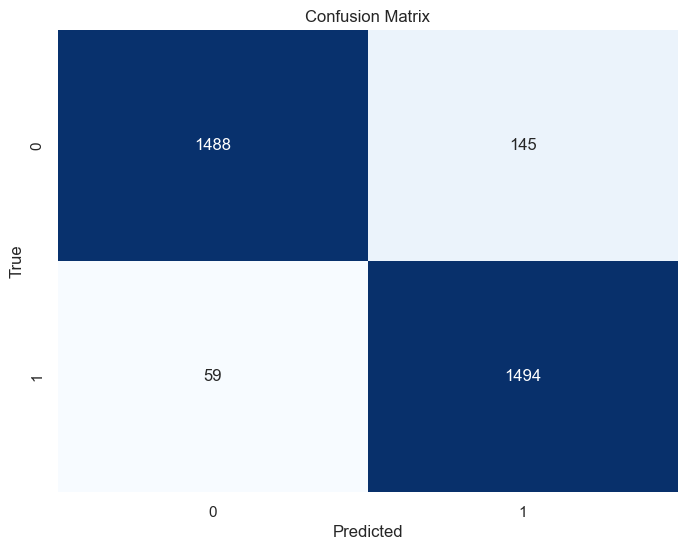

(array([[1488,  145],
        [  59, 1494]], dtype=int64),
 array([0.92189953, 0.9211146 , 0.91915228, 0.91208791, 0.92150706]))

In [45]:
evaluate(BaggingClassifier())

Melihat fitur mana yang paling berpengaruh ke churn(exited)

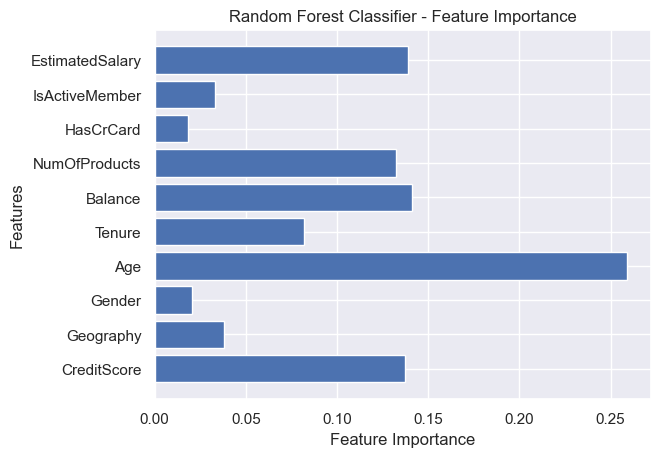

In [49]:
rf = RandomForestClassifier()
rf = rf.fit(X_train,y_train)
feature_importances = rf.feature_importances_
features = X.columns

plt.barh(features, feature_importances)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Random Forest Classifier - Feature Importance')
plt.show()

### Feature Importance pada Random Forest Classifier

Beberapa fitur memiliki importance yang lebih tinggi dibandingkan fitur lainnya. Berikut adalah beberapa insight dan rekomendasi berdasarkan feature importance tersebut:

#### Fitur dengan Importance Tinggi:
- **Age**: Usia memiliki pengaruh yang relatif besar. Hal ini menunjukkan bahwa usia merupakan faktor yang sangat penting dalam klasifikasi.
- **EstimatedSalary**: Gaji yang diestimasikan memiliki pengaruh besar terhadap klasifikasi. Hal ini menunjukkan bahwa gaji merupakan faktor penting dalam menentukan apakah seseorang termasuk dalam kategori tertentu.
- **CreditScore**: Skor kredit memiliki pengaruh yang relatif kecil. Hal ini menunjukkan bahwa skor kredit mungkin bukan faktor yang sangat penting dalam klasifikasi.
- **NumOfProducts**: Jumlah produk yang dimiliki memiliki pengaruh yang cukup besar. Hal ini menunjukkan bahwa jumlah produk yang dimiliki dapat menjadi indikator penting untuk klasifikasi.
- **Balance**: Saldo akun memiliki pengaruh yang cukup besar. Hal ini menunjukkan bahwa saldo akun dapat menjadi faktor penting dalam klasifikasi.

#### Fitur dengan Importance Menengah:

- **Tenure**: Lama waktu keanggotaan memiliki pengaruh yang cukup besar. Hal ini menunjukkan bahwa lama waktu keanggotaan dapat menjadi indikator penting untuk klasifikasi.

#### Fitur dengan Importance Rendah:
- **Gender**: Jenis kelamin memiliki pengaruh yang relatif kecil. Hal ini menunjukkan bahwa jenis kelamin mungkin bukan faktor yang sangat penting dalam klasifikasi.
- **Geography**: Lokasi geografis memiliki pengaruh yang relatif kecil. Hal ini menunjukkan bahwa lokasi geografis mungkin bukan faktor yang sangat penting dalam klasifikasi.

- **IsActiveMember**: Status keanggotaan aktif juga memiliki pengaruh besar. Hal ini menunjukkan bahwa keanggotaan aktif dapat menjadi indikator penting untuk klasifikasi.
- **HasCrCard**: Kepemilikan kartu kredit memiliki pengaruh yang cukup besar. Hal ini menunjukkan bahwa kepemilikan kartu kredit dapat menjadi faktor penting dalam klasifikasi.

#### Rekomendasi:
Berdasarkan insight di atas, berikut adalah beberapa rekomendasi yang dapat diberikan:

- Gunakan fitur dengan importance tinggi sebagai faktor utama dalam klasifikasi. Hal ini akan membantu meningkatkan akurasi klasifikasi.
- Pertimbangkan fitur dengan importance menengah untuk klasifikasi yang lebih detail. Fitur-fitur ini dapat membantu meningkatkan akurasi klasifikasi dalam situasi tertentu.
- Fitur dengan importance rendah dapat diabaikan untuk klasifikasi yang lebih sederhana. Hal ini dapat membantu meningkatkan efisiensi klasifikasi.
